In [1]:
from keras.datasets import imdb

In [2]:
(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=20000)

In [3]:
print(x_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [4]:
print(len(x_train[1]))

189


In [5]:
x_train.shape

(25000,)

In [6]:
x_val=x_train[20000:]
y_val=y_train[20000:]
x_train=x_train[:20000]
y_train=y_train[:20000]

In [7]:
# 句子长补到200，在前面补
from keras.preprocessing import sequence

x_train=sequence.pad_sequences(x_train, maxlen=200)
x_val=sequence.pad_sequences(x_val, maxlen=200)
x_test=sequence.pad_sequences(x_test, maxlen=200)

In [8]:
x_train[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,   194,  1153,   194,  8255,    78,   228,
           5,     6,  1463,  4369,  5012,   134,    26,     4,   715,
           8,   118,  1634,    14,   394,    20,    13,   119,   954,
         189,   102,     5,   207,   110,  3103,    21,    14,    69,
         188,     8,    30,    23,     7,     4,   249,   126,    93,
           4,   114,     9,  2300,  1523,     5,   647,     4,   116,
           9,    35,  8163,     4,   229,     9,   340,  1322,     4,
         118,     9,     4,   130,  4901,    19,     4,  1002,     5,
          89,    29,   952,    46,    37,     4,   455,     9,    45,
          43,    38,  1543,  1905,   398,     4,  1649,    26,  6853,
           5,   163,    11,  3215, 10156,     4,  1153,     9,   194,
         775,     7,  8255, 11596,   349,  2637,   148,   605, 15358,
        8003,    15,   123,   125,    68,     2,  6853,    15,   349,
         165,  4362,

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
%matplotlib inline

In [10]:
# 多层感知器神经网络
model1=Sequential()
# 2000个单词种类，输出128个词向量维度，句子长度
model1.add(Embedding(20000, 128, input_length=200))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [11]:
# 循环神经网络
model2=Sequential()
model2.add(Embedding(20000, 128, input_length=200))
model2.add(LSTM(128))  # 非输入层时，可识别其形状
model2.add(Dense(1, activation='sigmoid'))

In [12]:
# 卷积神经网络
model3=Sequential()
model3.add(Embedding(20000, 128, input_length=200))
model3.add(Dropout(0.2))
# 卷积层处理句子时可根据前后文章脉络抓取特征
model3.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
# 突显主要特征
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# 循环卷积神经网络
model4=Sequential()
model4.add(Embedding(20000, 128, input_length=200))
model4.add(Dropout(0.2))
model4.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(1, activation='sigmoid'))

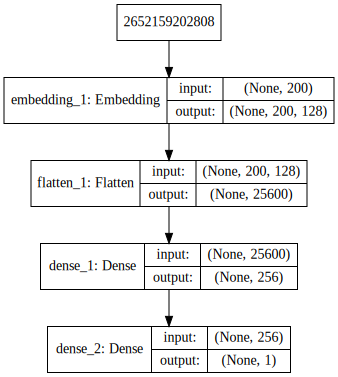

In [14]:
SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

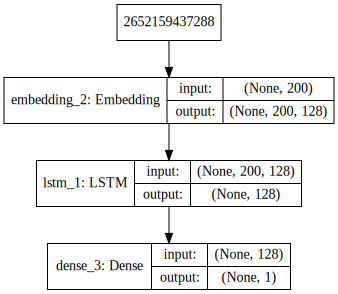

In [15]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

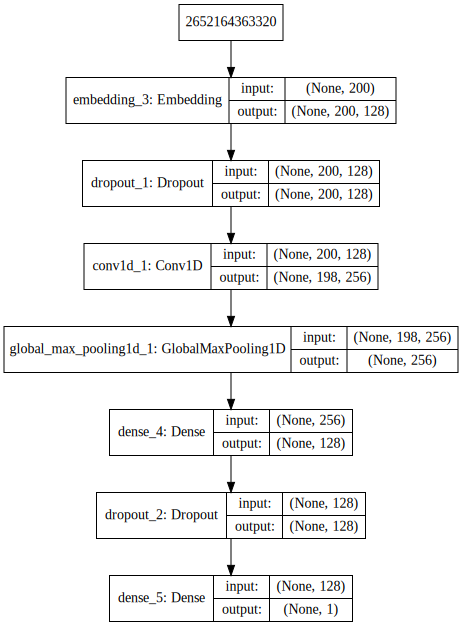

In [16]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

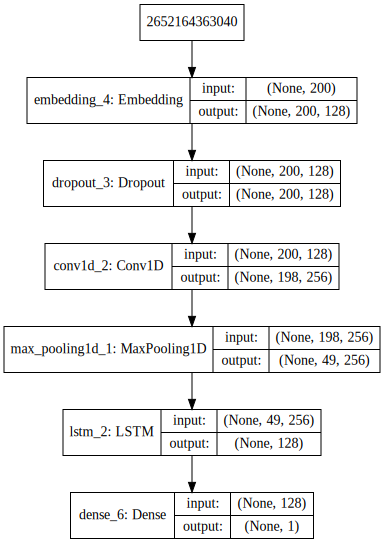

In [17]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [18]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
hist1=model1.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 8s 395us/step - loss: 0.4157 - acc: 0.7984 - val_loss: 0.3143 - val_acc: 0.8648
Epoch 2/2
20000/20000 [==============================] - 6s 287us/step - loss: 0.0464 - acc: 0.9860 - val_loss: 0.4317 - val_acc: 0.8596


In [20]:
hist2=model2.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 235s 12ms/step - loss: 0.4347 - acc: 0.7928 - val_loss: 0.3093 - val_acc: 0.8738
Epoch 2/2
20000/20000 [==============================] - 219s 11ms/step - loss: 0.2241 - acc: 0.9157 - val_loss: 0.3169 - val_acc: 0.8696


In [21]:
hist3=model3.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 8s 401us/step - loss: 0.4565 - acc: 0.7668 - val_loss: 0.3364 - val_acc: 0.8514
Epoch 2/2
20000/20000 [==============================] - 5s 249us/step - loss: 0.2109 - acc: 0.9172 - val_loss: 0.2640 - val_acc: 0.8954


In [22]:
hist4=model4.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 58s 3ms/step - loss: 0.4046 - acc: 0.8045 - val_loss: 0.3013 - val_acc: 0.8746
Epoch 2/2
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1794 - acc: 0.9338 - val_loss: 0.3201 - val_acc: 0.8766


In [24]:
import matplotlib.pyplot as plt

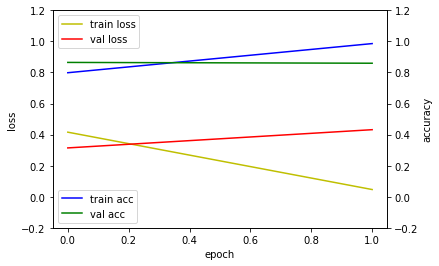

In [28]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

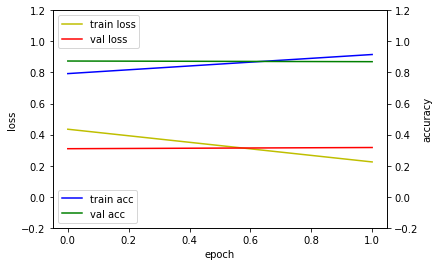

In [29]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

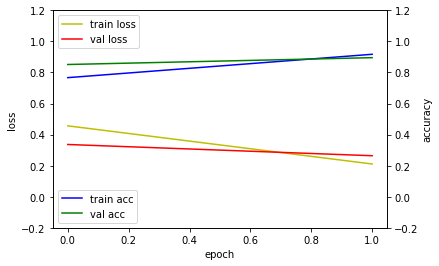

In [30]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

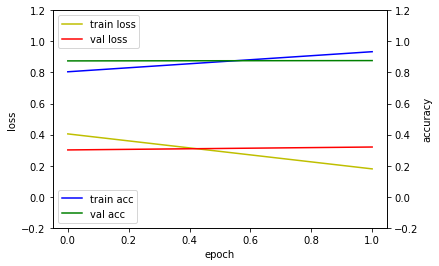

In [31]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist4.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [32]:
loss_metrics1=model1.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics1)

25000/25000 [==============================] - 1s 38us/step
[0.45634709151268005, 0.847720000038147]


In [33]:
loss_metrics2=model2.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics2)

25000/25000 [==============================] - 85s 3ms/step
[0.3395379027271271, 0.858919999961853]


In [34]:
loss_metrics3=model3.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics3)

25000/25000 [==============================] - 1s 49us/step
[0.27794751317977906, 0.882719999961853]


In [35]:
loss_metrics4=model4.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics4)

25000/25000 [==============================] - 24s 968us/step
[0.36429728490829466, 0.8604800000190734]
